<a href="https://colab.research.google.com/github/Soot3/Submissions/blob/master/StageBsubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 *Answers to the quiz questions are [below](https://colab.research.google.com/drive/1DU5pT9-XFeWpIPfYrG2mL8Sr7gu4Sf4q#scrollTo=SXxY6HRssIeh&line=1&uniqifier=1)*

# Appliances energy prediction Data Set

Experimental data used to create regression models of appliances energy use in a low energy building.



The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

Dataset gotten from [here](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [1]:
import pandas as pd

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv', parse_dates=['date'])

In [2]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Column Information:

 - date time year-month-day hour:minute:second
 - Appliances, energy use in Wh
 - lights, energy use of light fixtures in the house in Wh
 - T1, Temperature in kitchen area, in Celsius
 - RH_1, Humidity in kitchen area, in %
 - T2, Temperature in living room area, in Celsius
 - RH_2, Humidity in living room area, in %
 - T3, Temperature in laundry room area
 - RH_3, Humidity in laundry room area, in %
 - T4, Temperature in office room, in Celsius
 - RH_4, Humidity in office room, in %
 - T5, Temperature in bathroom, in Celsius
 - RH_5, Humidity in bathroom, in %
 - T6, Temperature outside the building (north side), in Celsius
 - RH_6, Humidity outside the building (north side), in %
 - T7, Temperature in ironing room , in Celsius
 - RH_7, Humidity in ironing room, in %
 - T8, Temperature in teenager room 2, in Celsius
 - RH_8, Humidity in teenager room 2, in %
 - T9, Temperature in parents room, in Celsius
 - RH_9, Humidity in parents room, in %
 - T_out, Temperature outside (from Chievres weather station), in Celsius
 - Press_mm_hg, Pressure (from Chievres weather station), in mm Hg
 - RH_out, Humidity outside (from Chievres weather station), in %
 - Wind speed (from Chievres weather station), in m/s
 - Visibility (from Chievres weather station), in km
 - Tdewpoint (from Chievres weather station), Â°C
 - rv1, Random variable 1, nondimensional
 - rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

No missing values, 29 columns, 19735 row entries

In [4]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
round(dataset.corr('pearson'),3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000,0.197,0.055,0.086,0.120,-0.060,0.085,0.036,0.040,0.017,0.020,0.007,0.118,-0.083,0.026,-0.056,0.040,-0.094,0.010,-0.051,0.099,-0.035,-0.152,0.087,0.000,0.015,-0.011,-0.011
lights,0.197,1.000,-0.024,0.107,-0.006,0.051,-0.097,0.131,-0.009,0.115,-0.079,0.141,-0.079,0.154,-0.135,0.035,-0.071,0.013,-0.158,-0.009,-0.074,-0.011,0.069,0.060,0.020,-0.036,0.001,0.001
T1,0.055,-0.024,1.000,0.164,0.837,-0.003,0.892,-0.029,0.877,0.098,0.885,-0.015,0.655,-0.615,0.839,0.135,0.825,-0.006,0.845,0.072,0.683,-0.151,-0.345,-0.088,-0.076,0.571,-0.006,-0.006
RH_1,0.086,0.107,0.164,1.000,0.270,0.798,0.253,0.845,0.106,0.880,0.206,0.303,0.316,0.245,0.021,0.801,-0.030,0.736,0.115,0.764,0.341,-0.294,0.274,0.205,-0.021,0.639,-0.001,-0.001
T2,0.120,-0.006,0.837,0.270,1.000,-0.166,0.735,0.121,0.762,0.232,0.721,0.030,0.801,-0.580,0.664,0.229,0.578,0.069,0.676,0.157,0.792,-0.133,-0.505,0.052,-0.070,0.583,-0.011,-0.011
RH_2,-0.060,0.051,-0.003,0.798,-0.166,1.000,0.137,0.678,-0.047,0.721,0.110,0.250,-0.010,0.390,-0.051,0.691,-0.041,0.680,0.055,0.676,0.034,-0.256,0.585,0.069,-0.005,0.499,0.006,0.006
T3,0.085,-0.097,0.892,0.253,0.735,0.137,1.000,-0.011,0.853,0.123,0.888,-0.066,0.687,-0.648,0.847,0.173,0.795,0.044,0.901,0.135,0.699,-0.190,-0.282,-0.101,-0.102,0.646,-0.005,-0.005
RH_3,0.036,0.131,-0.029,0.845,0.121,0.678,-0.011,1.000,-0.140,0.899,-0.050,0.375,0.077,0.515,-0.250,0.833,-0.283,0.829,-0.195,0.834,0.118,-0.233,0.356,0.263,0.017,0.414,-0.000,-0.000
T4,0.040,-0.009,0.877,0.106,0.762,-0.047,0.853,-0.140,1.000,-0.049,0.872,-0.076,0.652,-0.703,0.878,0.044,0.796,-0.095,0.889,-0.026,0.663,-0.075,-0.389,-0.186,-0.105,0.519,-0.002,-0.002
RH_4,0.017,0.115,0.098,0.880,0.232,0.721,0.123,0.899,-0.049,1.000,0.092,0.353,0.259,0.392,-0.131,0.894,-0.167,0.847,-0.045,0.857,0.293,-0.251,0.337,0.300,0.003,0.617,-0.002,-0.002


The temparatures have high correlations with themselves, this is also true with the  Humidities. rv1 and rv2 are highly correlated with each other possibly duplicates with their 1.0 correlation

## Regression Practice

Our target prediction variable is the Appliances column, after dropping the dates and lights columns we will test which combination of features adequately predictes the target column

In [7]:
dataset = dataset.drop(columns=['date', 'lights'])
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

features_df = normalized_df.drop(columns=['Appliances'])
prediction_target = normalized_df['Appliances']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, prediction_target, test_size=0.3, random_state = 42)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predictions, y_test)
round(mae, 3) # Mean Absolute Error

0.05

In [11]:
import numpy as np
rss = np.sum(np.square(y_test-predictions))
round(rss,3) # Residual Sum of Squares 

45.348

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3) # Root Mean Squared Error

0.088

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
round(r2, 3) # R-Squared

0.149

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

round(final_weights, 3)

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.457,-0.401,-0.000
1,T_out,-0.322,-0.251,0.000
2,T2,-0.236,-0.194,0.000
3,T9,-0.190,-0.189,-0.000
4,RH_8,-0.158,-0.157,-0.000
5,RH_out,-0.078,-0.051,-0.050
6,RH_7,-0.045,-0.046,-0.000
7,RH_9,-0.040,-0.042,-0.000
8,T5,-0.016,-0.021,-0.000
9,T1,-0.003,-0.022,0.000


RH_1 had the highest weight in the prediction model.


In [17]:
round(final_weights, 3).sort_values(['Lasso_weight'])

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
5,RH_out,-0.078,-0.051,-0.050
0,RH_2,-0.457,-0.401,-0.000
23,T6,0.236,0.213,0.000
22,Tdewpoint,0.118,0.077,0.000
21,T8,0.102,0.101,0.000
20,RH_3,0.096,0.095,0.000
19,RH_6,0.038,0.035,-0.000
17,T4,0.029,0.027,-0.000
16,RH_4,0.026,0.024,0.000
15,RH_5,0.016,0.016,0.000


#**Quiz Questions**



---



---


From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

---



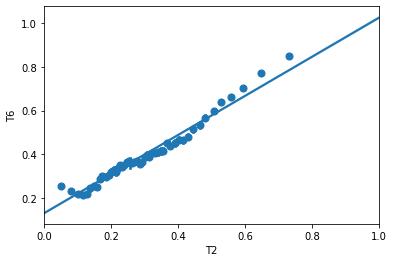

In [35]:
import seaborn as sns
sns.regplot(x='T2',y='T6', data=normalized_df, x_bins=50)

In [18]:
# Fitting the required model
features1 = normalized_df[['T2']]
prediction_target1 = normalized_df['T6']

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, prediction_target1, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train1, y_train1)
predictions1 = linear_model.predict(x_test1)

In [36]:
# The R^2 value in 2 D.P
r2_1 = r2_score(y_test1,predictions1)
round(r2_1,2)

0.64



---
What is the Residual Sum of Squares (in two decimal places)?

---



---




In [22]:
rss1 = np.sum(np.square(y_test1-predictions1))
round(rss1,2) # Residual Sum of Squares 

66.12



---
What is the Mean Absolute Error (in two decimal places)?

---



---




In [ ]:
mae1 = mean_absolute_error(y_test1, predictions1)
round(mae1,2) 



---
What is the Root Mean Squared Error (in three decimal places)?

---



---




In [23]:
rmse1 = np.sqrt(mean_squared_error(y_test1, predictions1))
round(rmse1, 3) # Root Mean Squared Error

0.106



---
What is the Coefficient of Determination (in two decimal places)? 

---



---



Coefficient of Determination is another name for R-Squared so we'll redo the metric

In [38]:
r2_1 = r2_score(y_test1,predictions1)
round(r2_1,2)

0.64



---
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

---



---





This question came below the question asking for a linear model between 'T2' and 'T6'. However it entails multiple features which is fits the previous model that targets the 'Appliances' column and features the rest of the dataset. That is what I used to answer this question

In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

round(final_weights, 3)

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.457,-0.401,-0.000
1,T_out,-0.322,-0.251,0.000
2,T2,-0.236,-0.194,0.000
3,T9,-0.190,-0.189,-0.000
4,RH_8,-0.158,-0.157,-0.000
5,RH_out,-0.078,-0.051,-0.050
6,RH_7,-0.045,-0.046,-0.000
7,RH_9,-0.040,-0.042,-0.000
8,T5,-0.016,-0.021,-0.000
9,T1,-0.003,-0.022,0.000


Therefore the answer was RH_2, RH_1



---



---


Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

---



In [24]:
ridge_reg1 = Ridge(alpha=0.4)
ridge_reg1.fit(x_train1, y_train1)

lasso_reg1 = Lasso(alpha=0.001)
lasso_reg1.fit(x_train1, y_train1)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
pre1=ridge_reg1.predict(x_test1)

rmse3 = np.sqrt(mean_squared_error(y_test1,pre1))
round(rmse3,3)

0.106

There was no change in RMSE when the ridge model was tweaked



---
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

---



---




This is another question that seems to be referring to the full feature model but came after the simple linear model requested. I answered 4 based on what I had done before



---
What is the new RMSE with the Lasso Regression (in 3 decimal places)?  

---



---




In [26]:
pre = lasso_reg1.predict(x_test1)

In [27]:
rmse2 = np.sqrt(mean_squared_error(y_test1,pre))
round(rmse2, 3)

0.106

No change in RMSE after tweaking lasso model

*As an aside, I have sent complaints about the quiz as I was a bit confused as to what exactly was being requested from me in some of the open ended questions because the only model requested was a simple linear model with one feature and one target. If the design of the quiz can be investigated please?* 

*Thank you for your time*